In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import time

# Equazione del calore

L'equazione del calore è della forma
$$
(\partial_t - \alpha \nabla^2) u = 0,
$$

dove la funzione $u(x, y, T) : \mathbb{R}^2 \times \mathbb{R}_{\geq 0} \to \mathbb{R}$. Per risolverla procediamo sempre tramite il metodo delle differenze finite usando il metodo di Gauss-Siedel. Ponendo l'operatore differenziale $L : L^2(\mathbb{R}^2 \times \mathbb{R}_{\geq 0}) \to L^2(\mathbb{R}^2 \times \mathbb{R}_{\geq 0})$, possiamo approssimare l'equazione nella seguente maniera
$$
    \frac{u^{j+1}_{k, m} - u_{k, m}^{j}}{h_t} - \alpha (\frac{u^j_{k+1, m} - 2u^j_{k, m} + u^j_{k-1, m}}{h_x^2} + \frac{u^j_{k, m+1} - 2u^j_{k, m} + u^j_{k, m-1}}{h_y^2}),
$$
da cui segue che
$$
u^{j+1}_{k, m} = \alpha h_t \left( \frac{u^j_{k+1, m} - 2u^j_{k, m} + u^j_{k-1, m}}{h_x^2} + \frac{u^j_{k, m+1} - 2u^j_{k, m} + u^j_{k, m-1}}{h_y^2} \right) + u^j_{k, m},
$$
se, per semplicità, prendiamo $h_x = h_y$ possiamo definire il parametro $\gamma = \frac{\alpha h_t}{h_x^2}$ l'equazione qua sopra si semplifica come
$$
u^{j+1}_{k, m} = \gamma \left(u^j_{k+1, m} - 2u^j_{k, m} + u^j_{k-1, m} + u^j_{k, m+1} - 2u^j_{k, m} + u^j_{k, m-1} \right) + u^j_{k, m}.
$$
Il parametro di stabilità di questa equazione si ha imponendo che
$$
4 \alpha \frac{h_t}{h_x^2} \ll 1
$$

Simulazione completata in 2.063 secondi


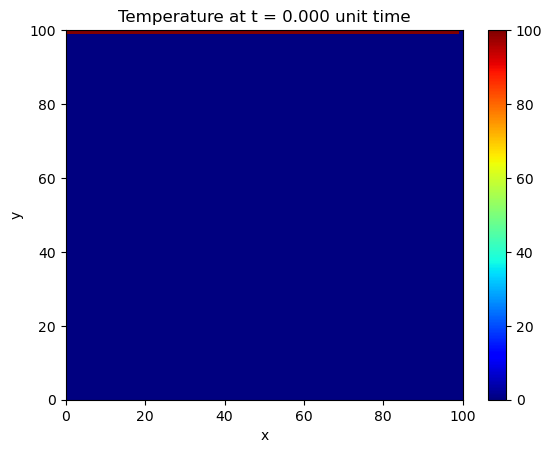

In [2]:
import numpy as np
import numba
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definizione dei parametri
delta_x = 0.01
alpha = 2.0
delta_t = (delta_x**2) / (4 * alpha)
Nt = int(1 / delta_t)  # Deve essere un intero
Nx = int(1 / delta_x)  # Deve essere un intero
edge = np.linspace(0, 1, Nx)
xv, yv = np.meshgrid(edge, edge)
u = np.zeros((Nx, Nx))
gamma = (alpha * delta_t) / (delta_x**2)

# Condizioni al contorno
u[0, :] = 0     # bordo sinistro
u[:, 0] = 0     # bordo inferiore
u[-1, :] = 100  # bordo destro
u[:, -1] = 0    # bordo superiore

@numba.jit("f8[:,:,:](f8[:,:], f8, i8, i8)", nopython=True, nogil=True, parallel=True)
def solve_heat(u, gamma, Nx, Nt):
    sol = np.zeros((Nt, Nx, Nx), dtype=np.float64)
    sol[0, :, :] = u  # Condizione iniziale

    for k in range(Nt - 1):  # Ciclo temporale
        sol[k+1, :, :] = u
        for i in numba.prange(1, Nx - 1):
            for j in numba.prange(1, Nx - 1):
                sol[k+1, i, j] = gamma * (sol[k, i+1, j] - 4 * sol[k, i, j] + sol[k, i-1, j] + sol[k, i, j+1] + sol[k, i, j-1]) + sol[k, i, j]
    
    return sol

def plotheatmap(u_k, k):
    plt.clf()
    plt.title(f"Temperature at t = {k * delta_t*1000:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    return plt

# Esecuzione del codice
start = time.time()
result = solve_heat(u, gamma, Nx, 10000)
end = time.time()
print(f"Simulazione completata in {end - start:.3f} secondi")
# Creazione dell'animazione
def animate(k):
    plotheatmap(result[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=delta_t * 1000, frames=10000, repeat=False)
anim.save("heat_equation_solution.gif", fps=60)



Simulazione completata in 1.363 secondi


KeyboardInterrupt: 

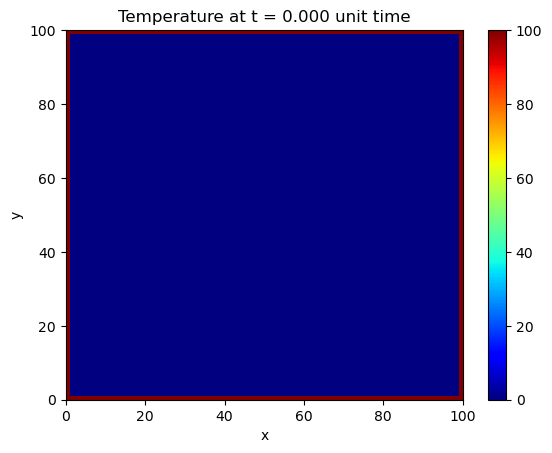

In [3]:
import numpy as np
import numba
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Definizione dei parametri
delta_x = 0.01
alpha = 2.0
delta_t = (delta_x**2) / (4 * alpha)
Nt = int(1 / delta_t)  # Deve essere un intero
Nx = int(1 / delta_x)  # Deve essere un intero
edge = np.linspace(0, 1, Nx)
xv, yv = np.meshgrid(edge, edge)
u = np.zeros((Nx, Nx))
gamma = (alpha * delta_t) / (delta_x**2)

# Condizioni al contorno
u[0, :] = 100     # bordo sinistro
u[:, 0] = 100    # bordo inferiore
u[-1, :] = 100  # bordo destro
u[:, -1] = 100    # bordo superiore

@numba.jit("f8[:,:,:](f8[:,:], f8, i8, i8)", nopython=True, nogil=True, parallel=True)
def solve_heat(u, gamma, Nx, Nt):
    sol = np.zeros((Nt, Nx, Nx), dtype=np.float64)
    sol[0, :, :] = u  # Condizione iniziale

    for k in range(Nt - 1):  # Ciclo temporale
        sol[k+1, :, :] = u
        for i in numba.prange(1, Nx - 1):
            for j in numba.prange(1, Nx - 1):
                sol[k+1, i, j] = gamma * (sol[k, i+1, j] - 4 * sol[k, i, j] + sol[k, i-1, j] + sol[k, i, j+1] + sol[k, i, j-1]) + sol[k, i, j]
    
    return sol

def plotheatmap(u_k, k):
    plt.clf()
    plt.title(f"Temperature at t = {k * delta_t * 1000:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()
    return plt

# Esecuzione del codice
start = time.time()
result = solve_heat(u, gamma, Nx, 10000)
end = time.time()
print(f"Simulazione completata in {end - start:.3f} secondi")
# Creazione dell'animazione
def animate(k):
    plotheatmap(result[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=delta_t * 1000, frames=10000, repeat=False)
anim.save("heat_equation_solution4edges.gif", fps=60)